<a href="https://colab.research.google.com/github/Kell1000/deep_Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Exemple : une seule image de chat (sous forme de tableau numpy)
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur avec transformations
datagen = ImageDataGenerator(
    rotation_range=35,         # Rotation aléatoire de 15 degrés
    width_shift_range=0.6,     # Décalage horizontal jusqu'à 10% de l'image
    height_shift_range=0.3,    # Décalage vertical jusqu'à 10% de l'image
    zoom_range=0.1,            # Zoom jusqu'à 10%
    horizontal_flip=True,      # Retourner horizontalement
    brightness_range=[0.5,1.5] # Modifier la luminosité
)

In [9]:
# Charger une image
img = image.load_img('/content/IA_CMC.png', target_size=(150, 150))  # adapte le chemin
x = image.img_to_array(img)      # Convertir en array
x = np.expand_dims(x, axis=0)    # Ajouter une dimension batch (1, 150, 150, 3)

# Créer un générateur d'images augmentées
augmented_images = datagen.flow(x, batch_size=1)



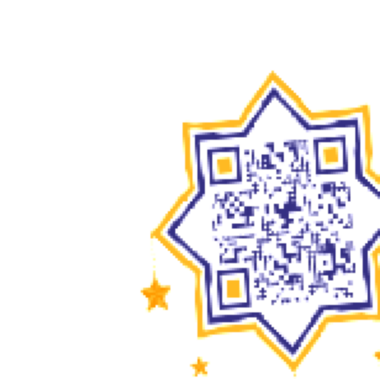

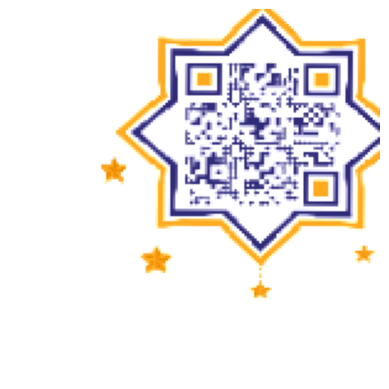

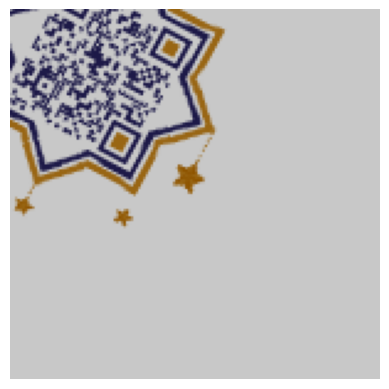

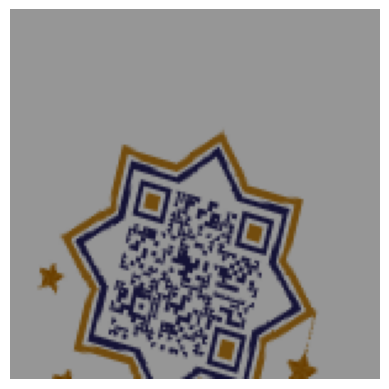

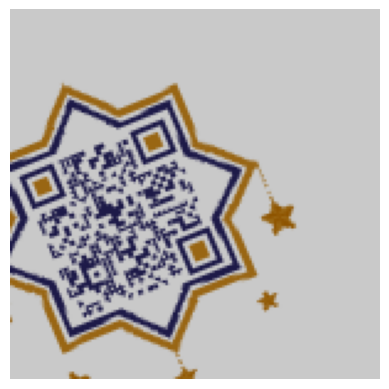

In [10]:
# Afficher quelques images générées
for i in range(5):
    batch = next(augmented_images)
    plt.imshow(batch[0].astype('uint8'))
    plt.axis('off')
    plt.show()

In [11]:
# Définir la couche de data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.RandomTranslation(0.1, 0.1),
    tf.keras.layers.RandomBrightness(factor=0.2)
])

In [12]:
# Exemple sur une image
img = tf.keras.preprocessing.image.load_img('/content/QRCode pour QUIZ_1_IA104_IA102_.png', target_size=(150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # ajouter batch dimension


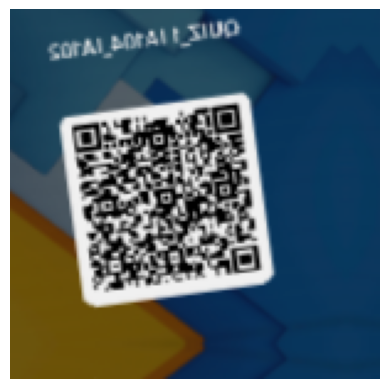

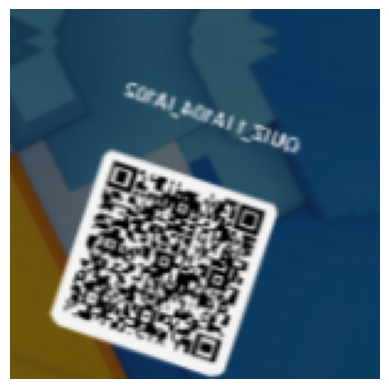

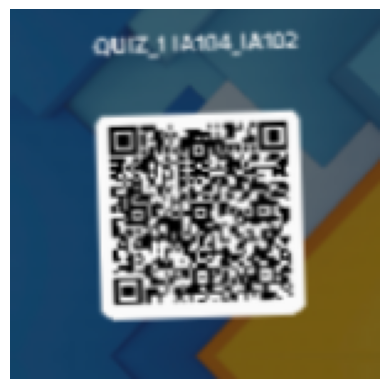

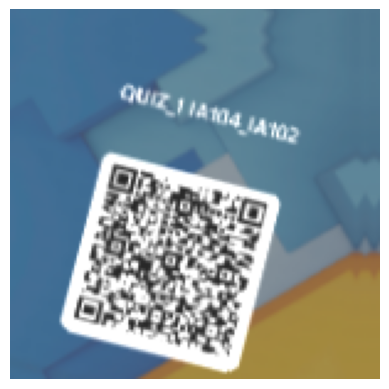

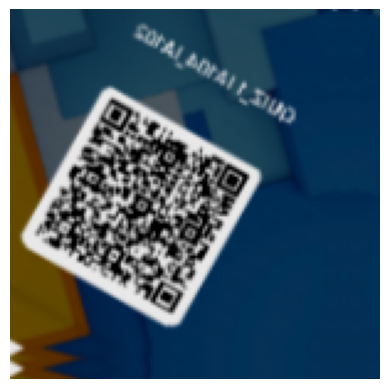

In [13]:

for i in range(5):
    augmented_img = data_augmentation(img_array)
    plt.imshow(augmented_img[0].numpy().astype("uint8"))
    plt.axis('off')
    plt.show()
# plt.imshow(augmented_img[0].numpy().astype("uint8"))
# plt.axis('off')
# plt.show()

In [ ]:
from google.colab import files

# Ouvre une boîte de dialogue pour uploader ton fichier
uploaded = files.upload()


In [ ]:
import zipfile
import os

# Définir le chemin du fichier zip uploadé
zip_file = '/content/cats_and_dogs_filtered.zip'
# Verification
try:
  with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    print("Le fichier est un fichier zip valide.")
    # Continuez avec l'extraction
    zip_ref.extractall('data')
except zipfile.BadZipFile:
  print("Le fichier n'est pas un fichier zip valide ou est corrompu.")
  # Téléchargez à nouveau le fichier ou vérifiez s'il est corrompu

# Chemins vers les dossiers
train_dir = os.path.join('data', 'cats_and_dogs_filtered', 'train')
val_dir = os.path.join('data', 'cats_and_dogs_filtered', 'validation')

print("Décompression terminée.")
print("Train dir:", train_dir)
print("Validation dir:", val_dir)

In [ ]:
# Définir la couche de data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.45),
    tf.keras.layers.RandomZoom(0.2),
])

In [ ]:
# Charger les données
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/data/cats_and_dogs_filtered/train",
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/data/cats_and_dogs_filtered/validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode='binary'
)


In [ ]:
image_batch, labels_batch = next(iter(train_ds))
# Apply data augmentation to the batch of images
augmented_images = data_augmentation(image_batch)
# Display a few augmented images
plt.figure(figsize=(10, 10))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(labels_batch[i])  # Display label (0 or 1)
    plt.axis("off")

plt.show()

* `from tensorflow.keras import layers:` Importe le module layers pour utiliser les couches de réseaux neuronaux, notamment Rescaling pour la normalisation.

* `dense_model = tf.keras.models.Sequential(...):` Crée un modèle séquentiel, une structure linéaire pour empiler les couches du réseau neuronal.

* `tf.keras.layers.Input(shape=(150, 150, 3)):` Définit la couche d'entrée du modèle, attendant des images de 150x150 pixels avec 3 canaux de couleur (RVB).

* `data_augmentation:` Applique des transformations aléatoires aux images d'entrée pour augmenter la taille du jeu de données et améliorer la généralisation du modèle.

* `layers.Rescaling(1./255):` Normalise les valeurs des pixels des images entre 0 et 1 pour optimiser les performances du réseau neuronal.

* `tf.keras.layers.Flatten():` Transforme la sortie multidimensionnelle des couches précédentes en un vecteur 1D pour la connecter aux couches denses.

* `tf.keras.layers.Dense(128, activation='relu'):` Ajoute une couche dense avec 128 neurones et une fonction d'activation ReLU pour introduire de la non-linéarité.

* `tf.keras.layers.Dense(1, activation='sigmoid'):` Définit la couche de sortie avec un neurone et une activation sigmoïde pour la classification binaire (ex: chat ou chien).

* `dense_model.compile(...):` Configure le modèle pour l'entraînement en spécifiant l'optimiseur, la fonction de perte et les métriques.

* `history_dense = dense_model.fit(...):` Lance l'entraînement du modèle en utilisant le jeu de données d'entraînement, le jeu de données de validation et le nombre d'époques.

In [ ]:
dense_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

dense_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Entraînement
history_dense = dense_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

In [ ]:
# 2. Modèle CNN
print('-------')
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Entraînement
history_cnn = cnn_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50
)

-------
Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.5002 - loss: 0.7081 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - accuracy: 0.4671 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - accuracy: 0.4735 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4759 - loss: 0.6952 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - accuracy: 0.4710 - loss: 0.6934 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4946 - loss: 0.6930 - val_accuracy: 0.6040 - val_loss: 0.6764
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5098 - loss: 0.6891 - val_accuracy: 0.5000 - val_loss: 0.6972
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4758 - loss: 0.6977 - val_accuracy: 0.

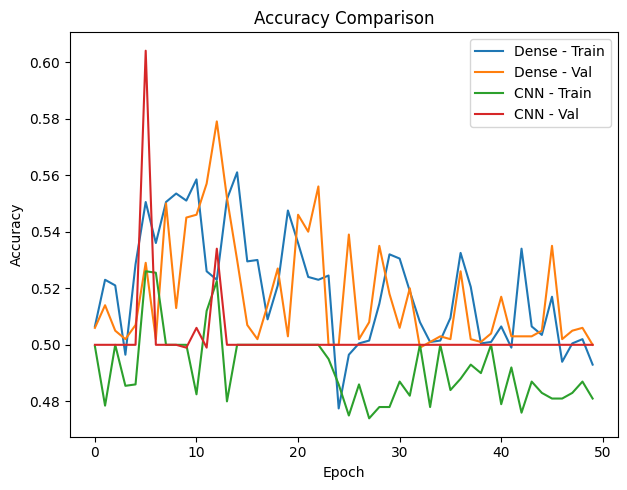

In [ ]:
# 3. Comparaison des performances
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dense.history['accuracy'], label='Dense - Train')
plt.plot(history_dense.history['val_accuracy'], label='Dense - Val')
plt.plot(history_cnn.history['accuracy'], label='CNN - Train')
plt.plot(history_cnn.history['val_accuracy'], label='CNN - Val')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

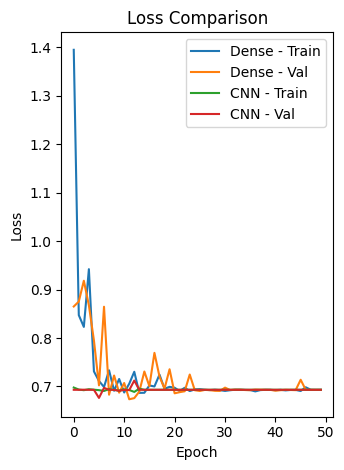

In [ ]:
# Loss
plt.subplot(1, 2, 2)
plt.plot(history_dense.history['loss'], label='Dense - Train')
plt.plot(history_dense.history['val_loss'], label='Dense - Val')
plt.plot(history_cnn.history['loss'], label='CNN - Train')
plt.plot(history_cnn.history['val_loss'], label='CNN - Val')
plt.title('Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

#### model Dense_Simple


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


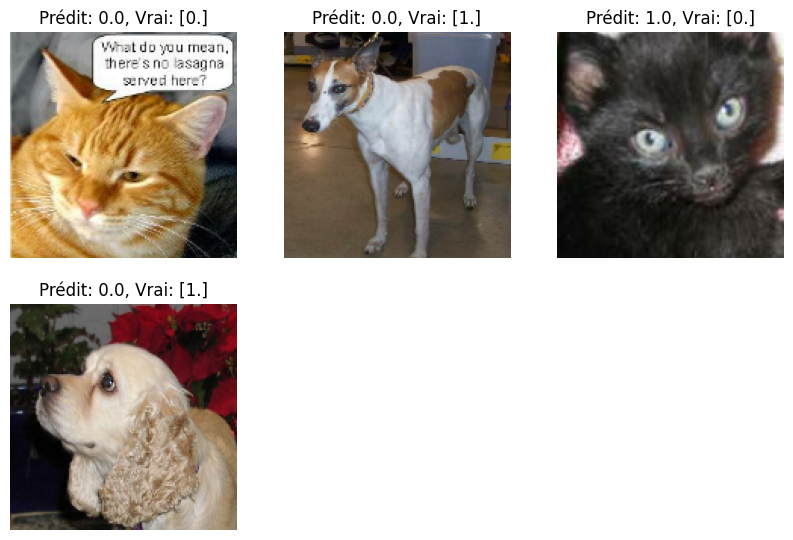

In [ ]:
predictions = cnn_model.predict(val_ds)
# Convertir les prédictions en classes (0 ou 1)
predicted_classes = np.round(predictions)

# Afficher quelques images avec leurs prédictions
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1): # Prendre un batch du dataset de validation
    for i in range(4):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Afficher la classe prédite et la vraie classe
        predicted_class = predicted_classes[i][0]
        true_class = labels[i].numpy()

        plt.title(f"Prédit: {predicted_class}, Vrai: {true_class}")

        plt.axis("off")
plt.show()

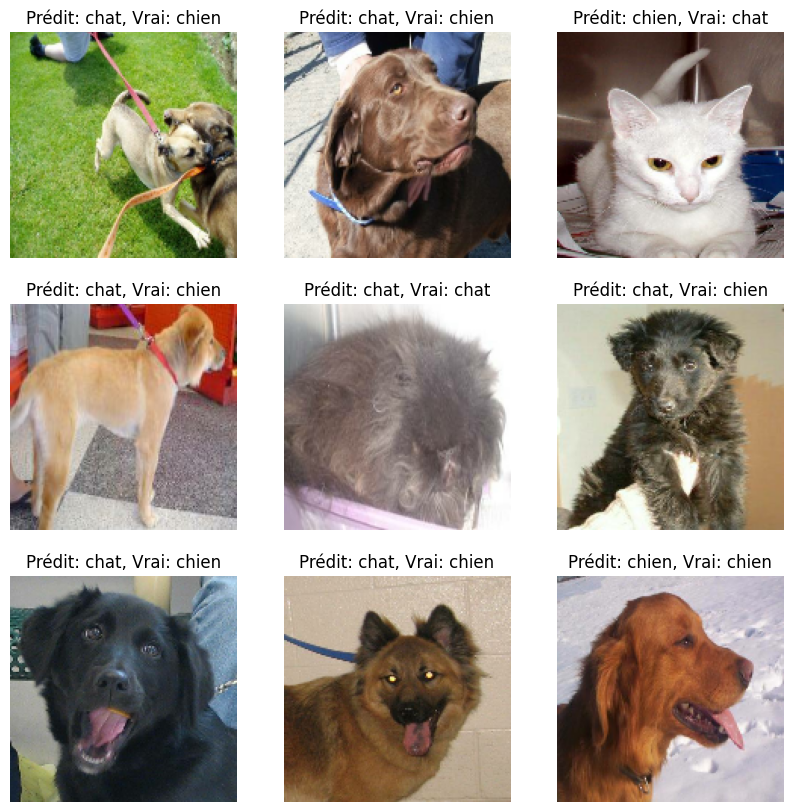

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1): # Prendre un batch du dataset de validation
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Afficher la classe prédite et la vraie classe
        predicted_class = predicted_classes[i][0]
        true_class = labels[i].numpy()

        # Encoder les labels
        predicted_label = "chien" if predicted_class == 1 else "chat"
        true_label = "chien" if true_class == 1 else "chat"

        plt.title(f"Prédit: {predicted_label}, Vrai: {true_label}")

        plt.axis("off")
plt.show()

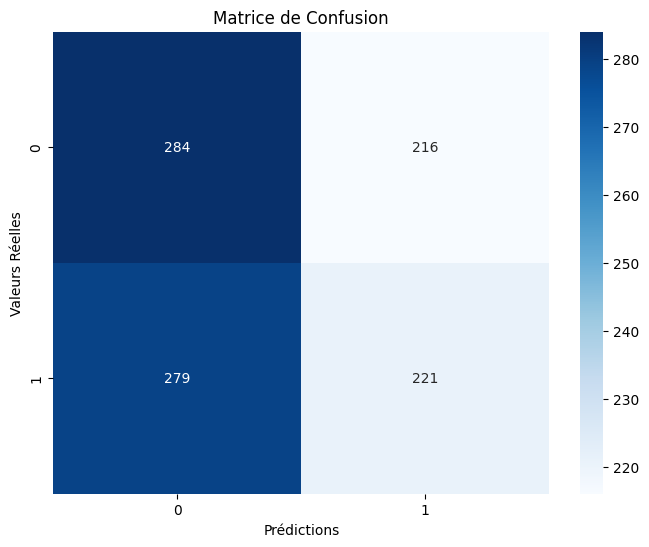

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_true = []
for images, labels in val_ds:
    y_true.extend(labels.numpy())

# Calculer la matrice de confusion
cm = confusion_matrix(y_true, predicted_classes)

# Afficher la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.show()

#### Model CNN